# Import the required libraries

In [1]:
# pip install tokens

  Preparing metadata (setup.py) ... done
  Created wheel for tokens: filename=tokens-0.0.3-py3-none-any.whl size=4232 sha256=0c9021cb306469c9909300baefc3abc199d18cccb2dce6e234916a417ad4b344
  Stored in directory: /root/.cache/pip/wheels/3c/72/56/526e5c2a15bf7576f90fbe72e2d956da7cedbeb052552e7f5b
Successfully built tokens
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno
import os
import json
import string
import re
import nltk
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.impute import KNNImputer
from pprint import pprint
import sklearn.metrics
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

from xgboost import XGBRegressor
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier


import warnings 
warnings.filterwarnings('ignore')

# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Users\fatma\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# Read the dataset and prepare it

In [2]:
country_names=['US','CA','DE','FR','GB','IN','JP','KR','MX','RU','BR']

In [3]:
# creates a dictionary that maps `category_id` to `category`
id_to_category = {}
d={}
for name in country_names:
    with open('archive/{}_category_id.json'.format(name), 'r') as f:
        data = json.load(f)
        for category in data['items']:
            id_to_category[category['id']] = category['snippet']['title']
            d["" + str(name)] = id_to_category

In [4]:
BR_Category = pd.DataFrame(d['BR'].items(), columns=['categoryId', 'Category'])
US_Category = pd.DataFrame(d['US'].items(), columns=['categoryId', 'Category'])
DE_Category = pd.DataFrame(d['DE'].items(), columns=['categoryId', 'Category'])
FR_Category = pd.DataFrame(d['FR'].items(), columns=['categoryId', 'Category'])
GB_Category = pd.DataFrame(d['GB'].items(), columns=['categoryId', 'Category'])
IN_Category = pd.DataFrame(d['IN'].items(), columns=['categoryId', 'Category'])
JP_Category = pd.DataFrame(d['JP'].items(), columns=['categoryId', 'Category'])
KR_Category = pd.DataFrame(d['KR'].items(), columns=['categoryId', 'Category'])
MX_Category = pd.DataFrame(d['MX'].items(), columns=['categoryId', 'Category'])
RU_Category = pd.DataFrame(d['RU'].items(), columns=['categoryId', 'Category'])
CA_Category = pd.DataFrame(d['CA'].items(), columns=['categoryId', 'Category'])

In [5]:
df_BR =pd.read_csv("archive/BR_youtube_trending_data.csv")
df_BR['country'] = "BR"
df_CA =pd.read_csv("archive/CA_youtube_trending_data.csv")
df_CA['country'] = "CA"
df_DE =pd.read_csv("archive/DE_youtube_trending_data.csv")
df_DE['country'] = "DE"
df_FR =pd.read_csv("archive/FR_youtube_trending_data.csv")
df_FR['country'] = "FR"
df_GB =pd.read_csv("archive/GB_youtube_trending_data.csv")
df_GB['country'] = "GB"
df_IN =pd.read_csv("archive/IN_youtube_trending_data.csv")
df_IN['country'] = "IN"
df_JP =pd.read_csv("archive/JP_youtube_trending_data.csv")
df_JP['country'] = "JP"
df_KR =pd.read_csv("archive/KR_youtube_trending_data.csv")
df_KR['country'] = "KR"
df_MX =pd.read_csv("archive/MX_youtube_trending_data.csv")
df_MX['country'] = "MX"
df_RU =pd.read_csv("archive/RU_youtube_trending_data.csv")
df_RU['country'] = "RU"
df_US =pd.read_csv("archive/US_youtube_trending_data.csv")
df_US['country'] = "US"

In [6]:
df_BR.categoryId = df_BR.categoryId.astype(str)
df_CA.categoryId = df_CA.categoryId.astype(str)
df_DE.categoryId = df_DE.categoryId.astype(str)
df_FR.categoryId = df_FR.categoryId.astype(str)
df_GB.categoryId = df_GB.categoryId.astype(str)
df_IN.categoryId = df_IN.categoryId.astype(str)
df_JP.categoryId = df_JP.categoryId.astype(str)
df_KR.categoryId = df_KR.categoryId.astype(str)
df_MX.categoryId = df_MX.categoryId.astype(str)
df_RU.categoryId = df_RU.categoryId.astype(str)
df_US.categoryId = df_US.categoryId.astype(str)

In [7]:
df_BR = pd.merge(df_BR,BR_Category,on='categoryId',how='left')

df_CA = pd.merge(df_CA,CA_Category,on='categoryId',how='left')

df_DE = pd.merge(df_DE,DE_Category,on='categoryId',how='left')

df_FR = pd.merge(df_FR,FR_Category,on='categoryId',how='left')

df_GB = pd.merge(df_GB,GB_Category,on='categoryId',how='left')

df_IN = pd.merge(df_IN,IN_Category,on='categoryId',how='left')

df_JP = pd.merge(df_JP,JP_Category,on='categoryId',how='left')

df_KR = pd.merge(df_KR,KR_Category,on='categoryId',how='left')

df_MX = pd.merge(df_MX,MX_Category,on='categoryId',how='left')

df_RU = pd.merge(df_RU,RU_Category,on='categoryId',how='left')

df_US = pd.merge(df_US,US_Category,on='categoryId',how='left')

In [8]:
df_final = pd.concat([df_BR,df_CA,df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US], axis=0, ignore_index=True)

In [9]:
df_final

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,Category
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,People & Blogs
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,Music
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,People & Blogs
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,Gaming
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400780,6j-NPPU2-0Q,Mommy Long Legs is Done Playing || Poppy Playt...,2022-05-06T18:00:02Z,UChL4WU9YLlxXXNSwlzM1-7g,SuperHorrorBro,20,2022-05-11T00:00:00Z,poppy playtime chapter 2|poppy playtime ch 2|p...,836262,30278,0,2518,https://i.ytimg.com/vi/6j-NPPU2-0Q/default.jpg,False,False,Poppy Playtime: Chapter 2 has arrived. This is...,US,Gaming
1400781,8zewhuMqKtY,Hotboy Wes - Dear Mr. Boosie [Freestyle],2022-05-04T19:00:02Z,UCoA8xyJ0qoXww3U5aAiH2hQ,Hotboy Wes,22,2022-05-11T00:00:00Z,Hotboy Wes|BigWalkDog|Studio|Studio Life|Miami...,547202,30145,0,1759,https://i.ytimg.com/vi/8zewhuMqKtY/default.jpg,False,False,Hotboy Wes - Dear Mr. BoosieDownload/Stream:Su...,US,People & Blogs
1400782,TSqYrgnbYrY,EXTREME Balloon Pop Racing!!,2022-05-06T22:00:12Z,UC5f5IV0Bf79YLp_p9nfInRA,How Ridiculous,17,2022-05-11T00:00:00Z,how ridiculous|rexy|44club,1240347,65689,0,2087,https://i.ytimg.com/vi/TSqYrgnbYrY/default.jpg,False,False,How FUN are balloon popping races?!Use code ST...,US,Sports
1400783,XUlKykxmIGk,FINDING OUT IM PREGNANT + TELLING ALEX,2022-05-04T20:02:25Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2022-05-11T00:00:00Z,[None],1186684,95477,0,10131,https://i.ytimg.com/vi/XUlKykxmIGk/default.jpg,False,False,"Hi babygirls! Thank you so much for watching, ...",US,Howto & Style


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400785 entries, 0 to 1400784
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   video_id           1400785 non-null  object
 1   title              1400785 non-null  object
 2   publishedAt        1400785 non-null  object
 3   channelId          1400785 non-null  object
 4   channelTitle       1400784 non-null  object
 5   categoryId         1400785 non-null  object
 6   trending_date      1400785 non-null  object
 7   tags               1400785 non-null  object
 8   view_count         1400785 non-null  int64 
 9   likes              1400785 non-null  int64 
 10  dislikes           1400785 non-null  int64 
 11  comment_count      1400785 non-null  int64 
 12  thumbnail_link     1400785 non-null  object
 13  comments_disabled  1400785 non-null  bool  
 14  ratings_disabled   1400785 non-null  bool  
 15  description        1351886 non-null  object
 16  

# Data analysis

In [11]:
# summary of the number of nulls
df_final.tags=df_final.tags.replace('[None]',np.nan)
print('Number of nulls in each column:')
df_final.isna().sum()

# count the ratio of missing values
total_miss = df_final.isnull().sum()
percent_miss = (total_miss/df_final.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

Number of nulls in each column:


video_id                  0
title                     0
publishedAt               0
channelId                 0
channelTitle              1
categoryId                0
trending_date             0
tags                 224317
view_count                0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
description           48899
country                   0
Category                  0
dtype: int64

,Total missing,% missing
tags,224317,16.013664
description,48899,3.490828
channelTitle,1,0.000071
video_id,0,0.000000
dislikes,0,0.000000
country,0,0.000000
ratings_disabled,0,0.000000
comments_disabled,0,0.000000
thumbnail_link,0,0.000000
comment_count,0,0.000000


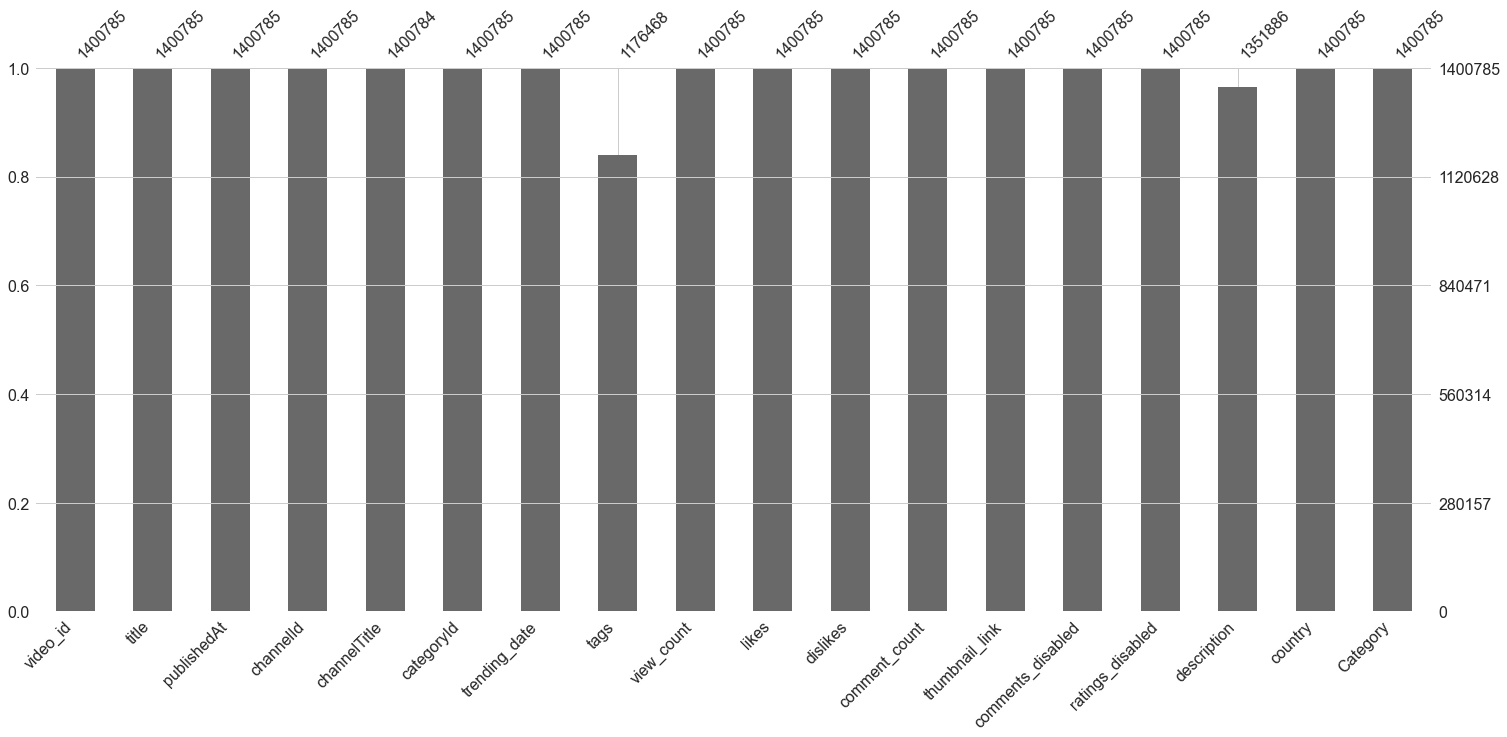

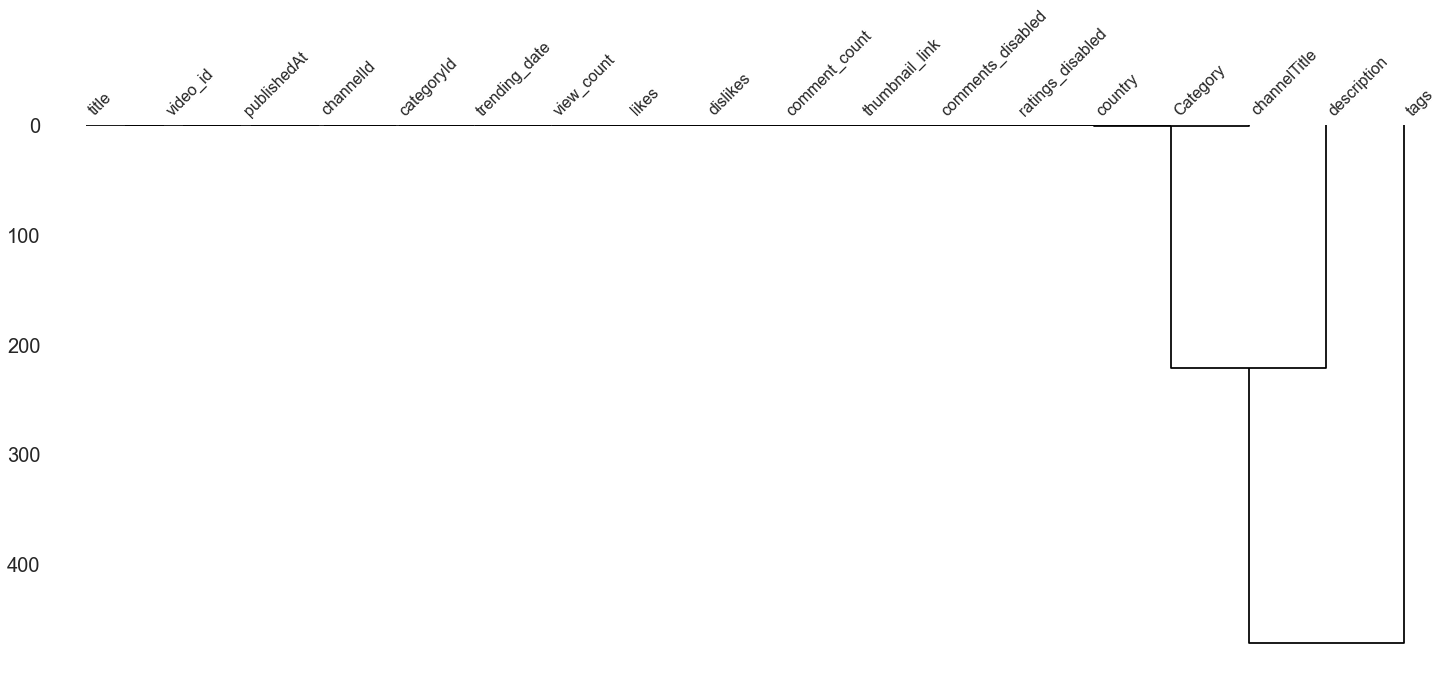

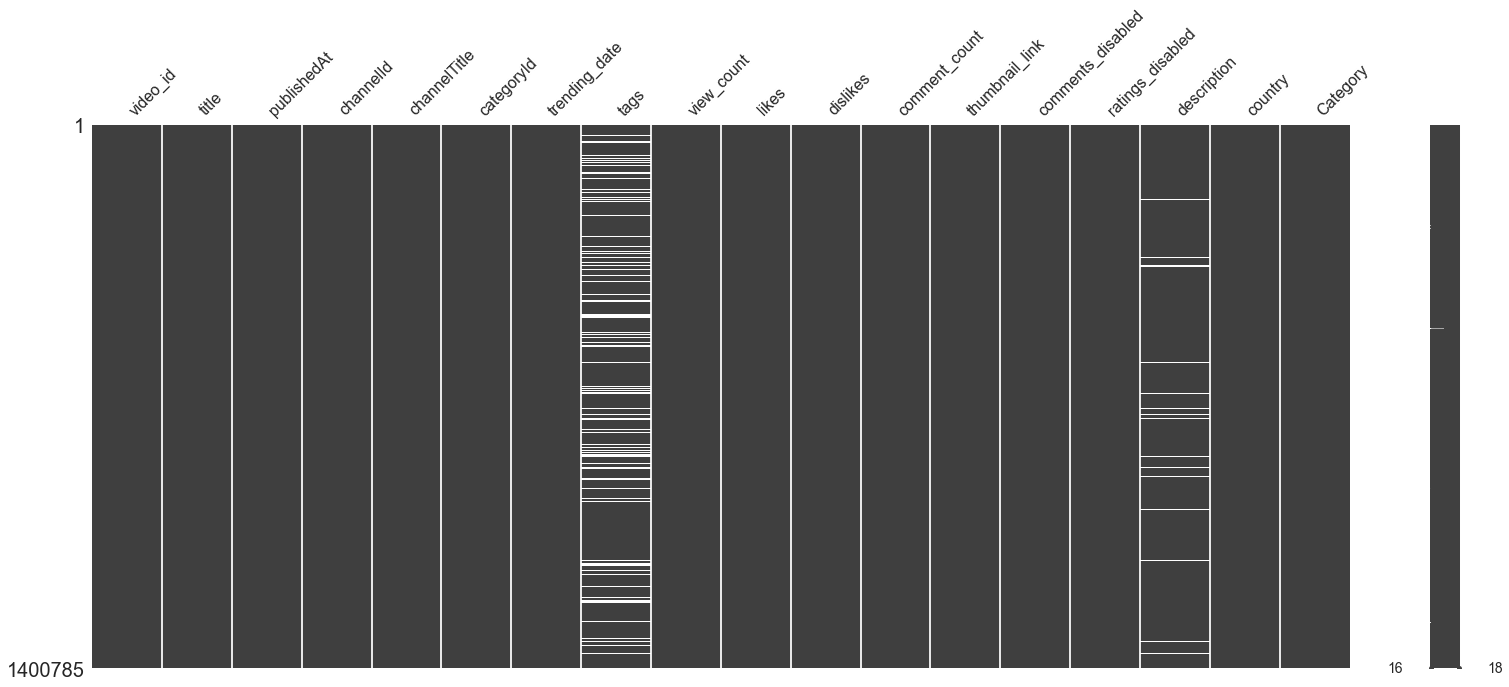

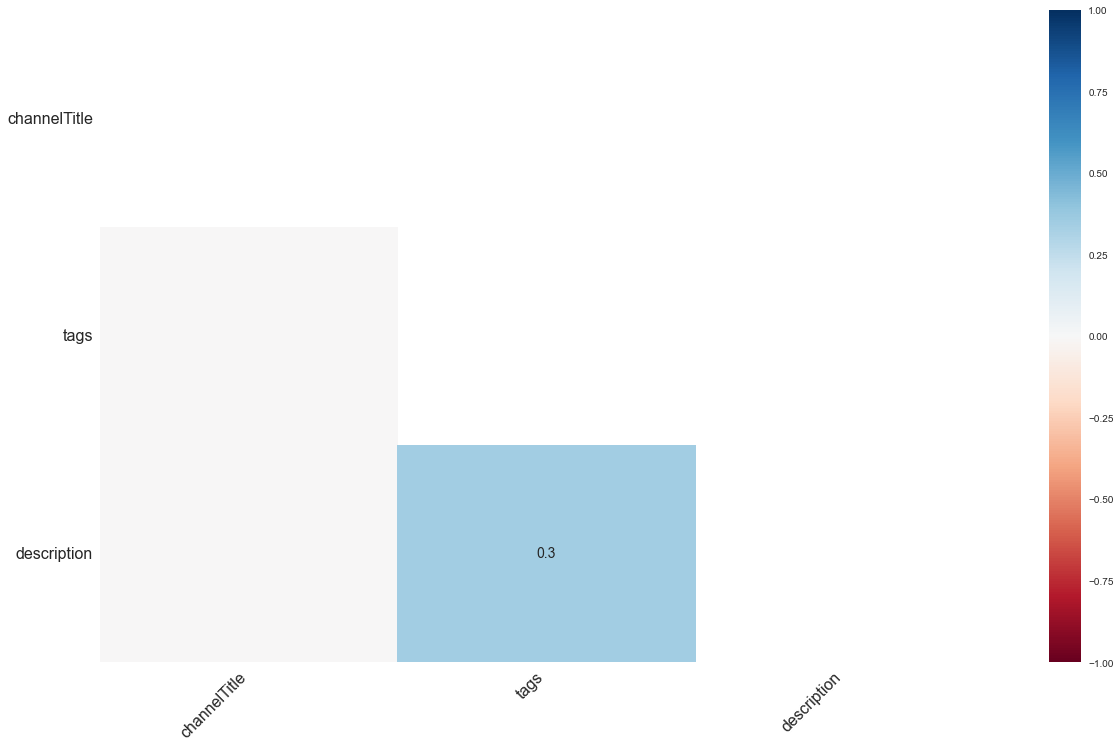

In [12]:
# Use missingno library to generate plots
#bar chart
msno.bar(df_final)
#dendrogram plot
msno.dendrogram(df_final)
#visualize missing values as a matrix
msno.matrix(df_final)
#heapmap for correlation analysis
msno.heatmap(df_final)

In [13]:
# any duplicate records?
# use the DataFrame.duplicated() method to return a series of boolean values
print('Check any duplicated')
df_final.duplicated()
print('\nSum of duplicated records = ', df_final.duplicated().sum())
print('\n________________________________________________________________')
# print the duplicated records as dataframe
dublicated = df_final[df_final.duplicated()]
# drop any duplicates
df_final = df_final.drop_duplicates()
print('\nSum of duplicated records after dropping= ', df_final.duplicated().sum())

Check any duplicated


0          False
1          False
2          False
3          False
4          False
           ...  
1400780    False
1400781    False
1400782    False
1400783    False
1400784    False
Length: 1400785, dtype: bool


Sum of duplicated records =  1223

________________________________________________________________

Sum of duplicated records after dropping=  0


In [14]:
# organize the date columns
df_final['trending_date'] = pd.to_datetime(df_final['trending_date'], format='%Y-%m-%d').apply(lambda x : x.date)
df_final['publishedAt'] = pd.to_datetime(df_final['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ')

In [15]:
df_final

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,Category
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,People & Blogs
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,Music
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,People & Blogs
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11 15:00:09,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,Gaming
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11 20:04:02,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400780,6j-NPPU2-0Q,Mommy Long Legs is Done Playing || Poppy Playt...,2022-05-06 18:00:02,UChL4WU9YLlxXXNSwlzM1-7g,SuperHorrorBro,20,2022-05-11,poppy playtime chapter 2|poppy playtime ch 2|p...,836262,30278,0,2518,https://i.ytimg.com/vi/6j-NPPU2-0Q/default.jpg,False,False,Poppy Playtime: Chapter 2 has arrived. This is...,US,Gaming
1400781,8zewhuMqKtY,Hotboy Wes - Dear Mr. Boosie [Freestyle],2022-05-04 19:00:02,UCoA8xyJ0qoXww3U5aAiH2hQ,Hotboy Wes,22,2022-05-11,Hotboy Wes|BigWalkDog|Studio|Studio Life|Miami...,547202,30145,0,1759,https://i.ytimg.com/vi/8zewhuMqKtY/default.jpg,False,False,Hotboy Wes - Dear Mr. BoosieDownload/Stream:Su...,US,People & Blogs
1400782,TSqYrgnbYrY,EXTREME Balloon Pop Racing!!,2022-05-06 22:00:12,UC5f5IV0Bf79YLp_p9nfInRA,How Ridiculous,17,2022-05-11,how ridiculous|rexy|44club,1240347,65689,0,2087,https://i.ytimg.com/vi/TSqYrgnbYrY/default.jpg,False,False,How FUN are balloon popping races?!Use code ST...,US,Sports
1400783,XUlKykxmIGk,FINDING OUT IM PREGNANT + TELLING ALEX,2022-05-04 20:02:25,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2022-05-11,NaN,1186684,95477,0,10131,https://i.ytimg.com/vi/XUlKykxmIGk/default.jpg,False,False,"Hi babygirls! Thank you so much for watching, ...",US,Howto & Style


# Data exploration

<Figure size 432x432 with 0 Axes>

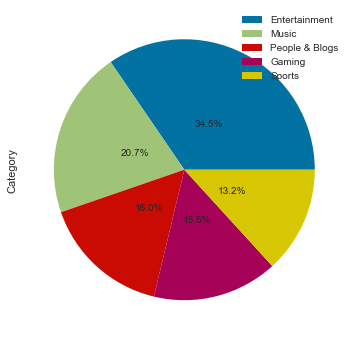

In [16]:
# visualize the percentage of each category
plt.figure(figsize=(6,6))
df_final['Category'].value_counts()[:5].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='upper right')

Text(0.5, 1.0, 'Correlation between number of views and likes')

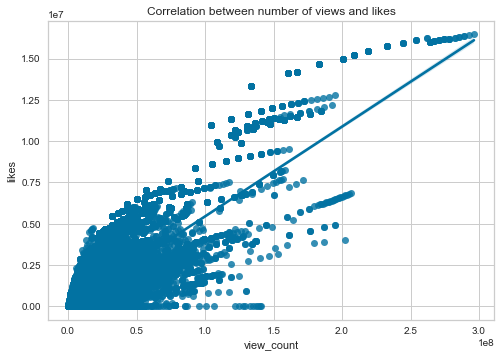

In [17]:
# Correlation between view_count and likes
sns.regplot(x='view_count',y='likes',data=df_final)
plt.title('Correlation between number of views and likes')

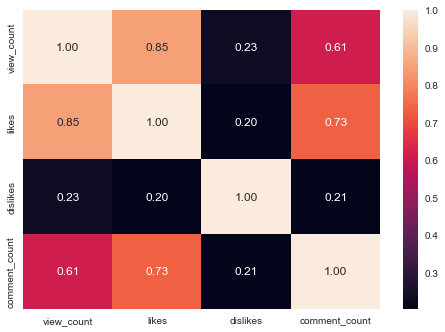

In [18]:
# Find Correlation using heatmap between view_count, likes, dislikes, comment_count
sns.heatmap(df_final[['view_count' , 'likes' , 'dislikes' , 'comment_count']].corr(), annot = True, fmt = ".2f")
plt.show()

Text(0.5, 1.0, 'Sum of Views vs country')

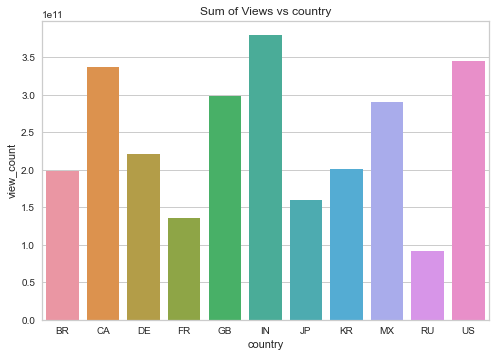

In [19]:
# Find number of views in each country
plt2 = df_final[['likes', 'dislikes', 'view_count', 'country']].groupby('country').sum()
sns.barplot(x=plt2.index, y=plt2.view_count).set_title('Sum of Views vs country')

Text(0.5, 1.0, 'Sum of likes by country')

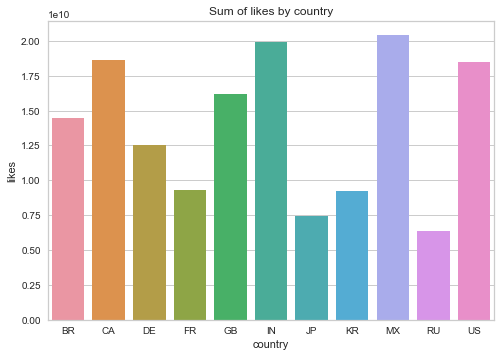

In [20]:
# Find number of likes in each country
sns.barplot(x=plt2.index, y=plt2.likes).set_title('Sum of likes by country')

Text(0.5, 1.0, 'Sum of dislikes by country')

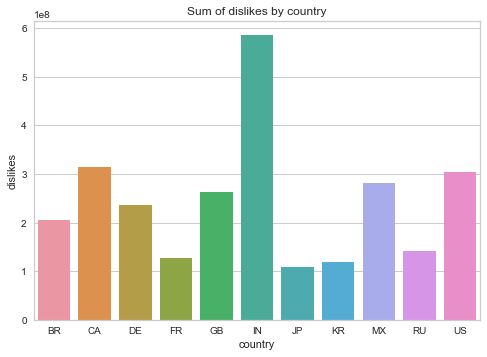

In [21]:
# Find number of dislikes in each country
sns.barplot(x=plt2.index, y=plt2.dislikes).set_title('Sum of dislikes by country')

In [22]:
df_final.info()
df_final.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399562 entries, 0 to 1400784
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   video_id           1399562 non-null  object        
 1   title              1399562 non-null  object        
 2   publishedAt        1399562 non-null  datetime64[ns]
 3   channelId          1399562 non-null  object        
 4   channelTitle       1399561 non-null  object        
 5   categoryId         1399562 non-null  object        
 6   trending_date      1399562 non-null  object        
 7   tags               1175419 non-null  object        
 8   view_count         1399562 non-null  int64         
 9   likes              1399562 non-null  int64         
 10  dislikes           1399562 non-null  int64         
 11  comment_count      1399562 non-null  int64         
 12  thumbnail_link     1399562 non-null  object        
 13  comments_disabled  1399562 

,view_count,likes,dislikes,comment_count
count,1.399562e+06,1.399562e+06,1.399562e+06,1.399562e+06
mean,1.897906e+06,1.092763e+05,1.920058e+03,8.903158e+03
std,5.947826e+06,3.820322e+05,3.198314e+04,8.771395e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.459180e+05,8.648000e+03,2.200000e+01,5.290000e+02
50%,5.962145e+05,2.513800e+04,2.560000e+02,1.463500e+03
75%,1.519998e+06,7.817700e+04,9.700000e+02,4.258000e+03
max,2.963142e+08,1.646425e+07,1.234147e+07,6.939302e+06


# Feature engineering

## Handling missing values
From my observations the missing values are Missing Not At Random, as i think they depend on unobserved data, and i can not explain the pattern in the missing data. So, I'm going to drop them.

In [23]:
df_final = df_final.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167270 entries, 0 to 1400784
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   video_id           1167270 non-null  object        
 1   title              1167270 non-null  object        
 2   publishedAt        1167270 non-null  datetime64[ns]
 3   channelId          1167270 non-null  object        
 4   channelTitle       1167270 non-null  object        
 5   categoryId         1167270 non-null  object        
 6   trending_date      1167270 non-null  object        
 7   tags               1167270 non-null  object        
 8   view_count         1167270 non-null  int64         
 9   likes              1167270 non-null  int64         
 10  dislikes           1167270 non-null  int64         
 11  comment_count      1167270 non-null  int64         
 12  thumbnail_link     1167270 non-null  object        
 13  comments_disabled  1167270 

## Features extraction

In [24]:
# remove punctuation from tags column
def remove_punc(text):
    text = str(text).replace('|',' ')
    text = "".join([chart for chart in text if chart not in string.punctuation])

    return text

df_final['tags_clean'] = df_final['tags'].apply(lambda x: remove_punc(x))

In [25]:
# make the words in lowercase
def tokenizer(text):
    tokens = re.split('\W+',text)
    return tokens

df_final['tokens'] = df_final['tags_clean'].apply(lambda x: tokenizer(x.lower()))

In [26]:
# remove stopwords and not alphabet letters
nltk.download('stopwords')
stopwords_en = nltk.corpus.stopwords.words('english')
stopwords_sp = nltk.corpus.stopwords.words('spanish')

stopwords = stopwords_en + stopwords_sp

def remove_stopwords(tokens):
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

df_final['tokens'] = df_final['tokens'].apply(lambda x: remove_stopwords(x))

def remove_numb(tokens):
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

df_final['tokens'] = df_final['tokens'].apply(lambda x: remove_numb(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# count how many times each unique word appeard in each record
unique_videos = df_final[['title','video_id']].drop_duplicates()

c = Counter()
def counter(text):
      c.update(text)
df_final.loc[unique_videos.index,'tokens'].apply(lambda x: counter(x))

common_words_1 = [word[0] for word in c.most_common()[:300]]

0          None
1          None
2          None
3          None
4          None
           ... 
1400626    None
1400627    None
1400629    None
1400630    None
1400634    None
Name: tokens, Length: 222465, dtype: object

In [28]:
# remove the words that are from 1 letter 
mono_words = list()
for word in common_words_1:
    if len(word)==1:
        mono_words.append(word)

for word in mono_words:
    common_words_1.remove(word)

In [29]:
len(common_words_1)

287

In [30]:
# convert the words into columns and in each record put the count of each word in its column
for word in common_words_1:
    df_final[word] = df_final['tokens'].apply(lambda x: x.count(word)) 

In [31]:
# split the date and time from published at column
df_final['new_date_published'] = [d.date() for d in df_final['publishedAt']]
df_final['new_time_published'] = [d.time() for d in df_final['publishedAt']]

In [32]:
# Create new columns for the date for the published at and trending_date columns
df_final['year_published'] = pd.DatetimeIndex(df_final['new_date_published']).year
df_final['month_published'] = pd.DatetimeIndex(df_final['new_date_published']).month
df_final['day_published'] = pd.DatetimeIndex(df_final['new_date_published']).day

df_final['hour_published'] = df_final['publishedAt'].dt.hour
df_final['minute_published'] = df_final['publishedAt'].dt.minute
df_final['second_published'] = df_final['publishedAt'].dt.second

df_final['year_trending'] = pd.DatetimeIndex(df_final['trending_date']).year
df_final['month_trending'] = pd.DatetimeIndex(df_final['trending_date']).month
df_final['day_trending'] = pd.DatetimeIndex(df_final['trending_date']).day

In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167270 entries, 0 to 1400784
Columns: 318 entries, video_id to day_trending
dtypes: bool(2), datetime64[ns](1), int64(300), object(15)
memory usage: 2.8+ GB


## Skweness handling

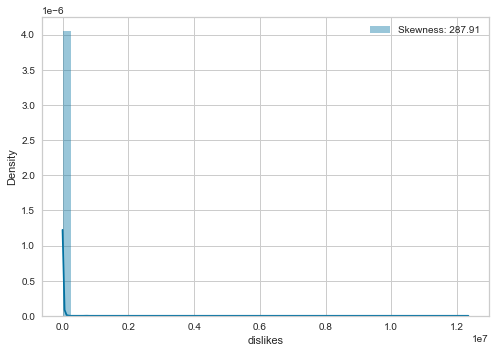

In [34]:
# plot the histogram of the dislikes column
t=sns.distplot(df_final['dislikes'],label="Skewness: %.2f"%(df_final['dislikes'].skew()) )
t.legend()

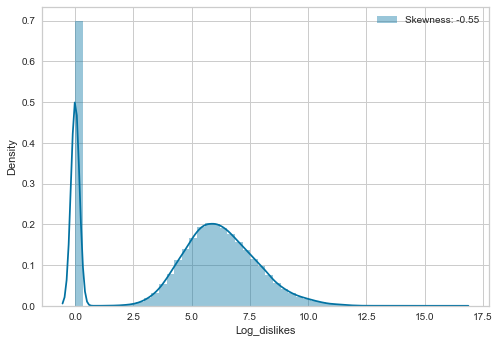

In [35]:
# handle the right skewed by log transform
df_final['Log_dislikes'] = df_final['dislikes'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(df_final['Log_dislikes'],label="Skewness: %.2f"%(df_final['Log_dislikes'].skew()) )
t.legend()

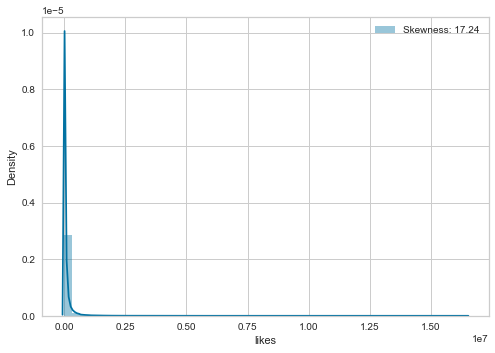

In [36]:
# plot the histogram of the likes column
t=sns.distplot(df_final['likes'],label="Skewness: %.2f"%(df_final['likes'].skew()) )
t.legend()

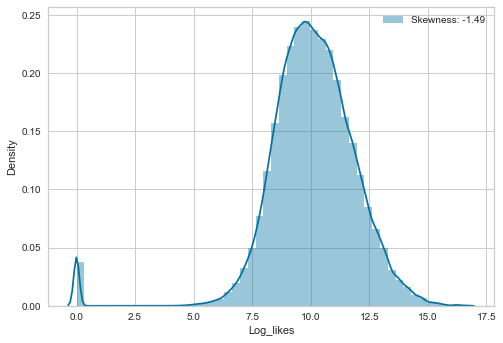

In [37]:
# handle the right skewed by log transform
df_final['Log_likes'] = df_final['likes'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(df_final['Log_likes'],label="Skewness: %.2f"%(df_final['Log_likes'].skew()) )
t.legend()

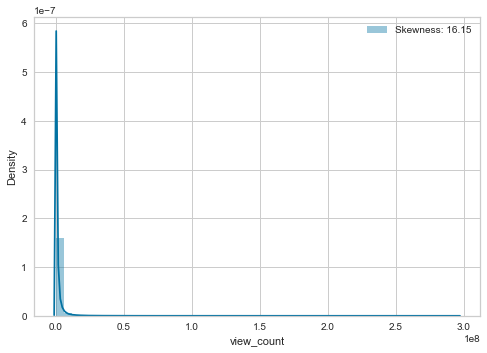

In [38]:
# plot the histogram of the views_count column
t=sns.distplot(df_final['view_count'],label="Skewness: %.2f"%(df_final['view_count'].skew()) )
t.legend()

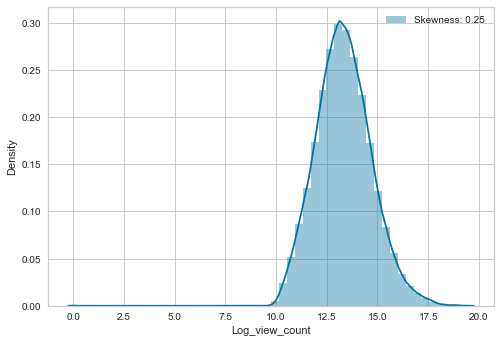

In [39]:
# handle the right skewed by log transform
df_final['Log_view_count'] = df_final['view_count'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(df_final['Log_view_count'],label="Skewness: %.2f"%(df_final['Log_view_count'].skew()) )
t.legend()

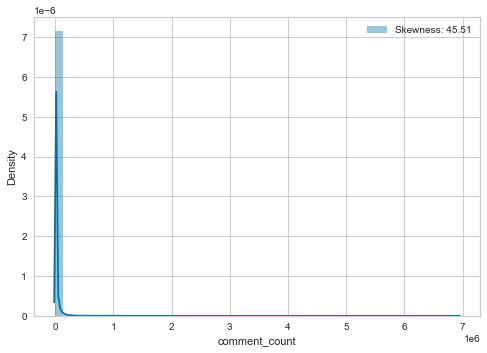

In [40]:
# plot the histogram of the comments count column
t=sns.distplot(df_final['comment_count'],label="Skewness: %.2f"%(df_final['comment_count'].skew()) )
t.legend()


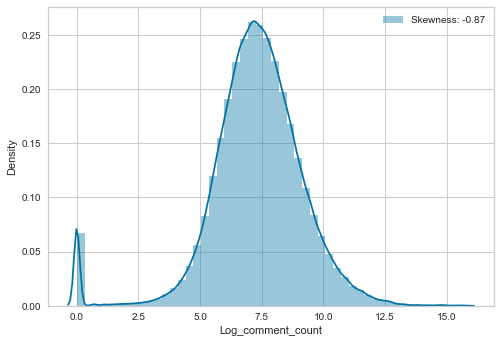

In [41]:
# handle the skewed by log transform
df_final['Log_comment_count'] = df_final['comment_count'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(df_final['Log_comment_count'],label="Skewness: %.2f"%(df_final['Log_comment_count'].skew()) )
t.legend()

## Drop the duplicates based on the title and video id columns
As there are some videos may be trended more than one time so they won't have the same entries in all features but actually they are duplicated

In [42]:
len(df_final['title'].unique()) 
len(df_final['video_id'].unique()) 

221383

217643

In [43]:
# drop rows which have same video id or title and keep latest entry
df_final_new = df_final.drop_duplicates(
  subset = ['title', 'video_id'],  keep = 'last').reset_index(drop = True)
df_final_new.info()
df_final_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222465 entries, 0 to 222464
Columns: 322 entries, video_id to Log_comment_count
dtypes: bool(2), datetime64[ns](1), float64(4), int64(300), object(15)
memory usage: 543.6+ MB


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,hour_published,minute_published,second_published,year_trending,month_trending,day_trending,Log_dislikes,Log_likes,Log_view_count,Log_comment_count
0,8irga_AqRdw,Minicurso Gratuito - Aula 1 - Receitas que vendem,2020-08-12 02:16:40,UCeTKpYNnUeJ3g_9pbCpt3XA,Gordices da Deia,27,2020-08-12,gordices da deia|chantilly|bolo|confeitaria|de...,33204,8445,...,2,16,40,2020,8,12,4.060443,9.041330,10.410426,5.327876
1,54g-G3CvgxI,MASTERCHEF BRASIL (11/08/2020) | PARTE 1 | EP ...,2020-08-12 08:00:00,UC2EWGw-KBjEReUbXMJEiaCA,MasterChef Brasil,24,2020-08-12,masterchef brasil|masterchef temporada 7|parti...,259074,14175,...,8,0,0,2020,8,12,5.147494,9.559235,12.464869,7.037906
2,M91gKrhW8tY,Por que a ÁGUA sai BRANCA da torneira? #Aprend...,2020-08-08 14:30:06,UCKHhA5hN2UohhFDfNXB_cvQ,Manual do Mundo,28,2020-08-12,como fazer|como funciona|experiência|teste|ciê...,429257,79918,...,14,30,6,2020,8,12,6.202536,11.288756,12.969811,8.477620
3,efBoqfN2aWs,JÁ FIQUEI COM YOUTUBERS? - QUEM ME CONHECE MEL...,2020-08-07 23:53:57,UCcBfPvc-87sAEyA7yqHG4wg,LOUD Mii,24,2020-08-12,miiedb|mii esquierdo|loud|loud mii|Loud Mob|Lo...,284510,65009,...,23,53,57,2020,8,12,5.843544,11.082281,12.558524,7.469084
4,jQhwyCc4_bs,Péricles - Tô Achando Que é Amor (Videoclipe...,2020-08-07 13:59:39,UCOUqW2QqiOFK9fXA5cAOENA,Canal do Pericão,10,2020-08-12,pericles|samba|pericles samba|pericles exalta|...,775634,15580,...,13,59,39,2020,8,12,5.176150,9.653743,13.561436,6.206576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222460,To4DFfXYDlc,Film Theory: Netflix is DYING... but I can SAV...,2022-05-05 18:05:04,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,1,2022-05-11,netflix|netflix broken|netflix movies|netflix ...,2050042,131413,...,18,5,4,2022,5,11,0.000000,11.786100,14.533371,9.117786
222461,6j-NPPU2-0Q,Mommy Long Legs is Done Playing || Poppy Playt...,2022-05-06 18:00:02,UChL4WU9YLlxXXNSwlzM1-7g,SuperHorrorBro,20,2022-05-11,poppy playtime chapter 2|poppy playtime ch 2|p...,836262,30278,...,18,0,2,2022,5,11,0.000000,10.318177,13.636697,7.831220
222462,8zewhuMqKtY,Hotboy Wes - Dear Mr. Boosie [Freestyle],2022-05-04 19:00:02,UCoA8xyJ0qoXww3U5aAiH2hQ,Hotboy Wes,22,2022-05-11,Hotboy Wes|BigWalkDog|Studio|Studio Life|Miami...,547202,30145,...,19,0,2,2022,5,11,0.000000,10.313774,13.212573,7.472501
222463,TSqYrgnbYrY,EXTREME Balloon Pop Racing!!,2022-05-06 22:00:12,UC5f5IV0Bf79YLp_p9nfInRA,How Ridiculous,17,2022-05-11,how ridiculous|rexy|44club,1240347,65689,...,22,0,12,2022,5,11,0.000000,11.092687,14.030902,7.643483


In [44]:
# drop old columns after making feature extraction from them, and drop video id and thumbnail_link as they refer to an ID for 
# each video (record)
df_final_new = df_final_new.drop(['tags', 'publishedAt', 'trending_date', 'new_date_published', 'new_time_published', 'tags_clean',
                          'tokens','video_id', 'thumbnail_link', 'title'], axis=1)

## Categotical encoding

In [45]:
df_final_cat = df_final_new.select_dtypes(include=['object'])
df_final_cat.columns

Index(['channelId', 'channelTitle', 'categoryId', 'description', 'country',
       'Category'],
      dtype='object')

In [46]:
# as the columns contains categorical values and we need numerical values so I use label encoding to make this
df_col=list(df_final_cat.columns)
result_data=df_final_new.copy()
for i in range(len(df_col)):
    result_data[df_col[i]] = LabelEncoder().fit_transform(result_data[df_col[i]].astype(str))
result_data

,channelId,channelTitle,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,...,hour_published,minute_published,second_published,year_trending,month_trending,day_trending,Log_dislikes,Log_likes,Log_view_count,Log_comment_count
0,18996,8074,12,33204,8445,58,206,False,False,94654,...,2,16,40,2020,8,12,4.060443,9.041330,10.410426,5.327876
1,1501,13147,9,259074,14175,172,1139,False,False,21450,...,8,0,0,2020,8,12,5.147494,9.559235,12.464869,7.037906
2,9613,12902,13,429257,79918,494,4806,False,False,112187,...,14,30,6,2020,8,12,6.202536,11.288756,12.969811,8.477620
3,18002,11232,9,284510,65009,345,1753,False,False,78960,...,23,53,57,2020,8,12,5.843544,11.082281,12.558524,7.469084
4,11469,3525,1,775634,15580,177,496,False,False,82606,...,13,59,39,2020,8,12,5.176150,9.653743,13.561436,6.206576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222460,2267,20222,0,2050042,131413,0,9116,False,False,48282,...,18,5,4,2022,5,11,0.000000,11.786100,14.533371,9.117786
222461,20274,19285,6,836262,30278,0,2518,False,False,84827,...,18,0,2,2022,5,11,0.000000,10.318177,13.636697,7.831220
222462,23313,8808,7,547202,30145,0,1759,False,False,54430,...,19,0,2,2022,5,11,0.000000,10.313774,13.212573,7.472501
222463,3089,8817,3,1240347,65689,0,2087,False,False,54453,...,22,0,12,2022,5,11,0.000000,11.092687,14.030902,7.643483


### Save the data after preprocessing in case of any problem to not make the preprocessing again

In [47]:
result_data.to_csv('result_data_new.csv', index=False)

In [48]:
result_data =pd.read_csv("result_data_new.csv")

In [49]:
result_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222465 entries, 0 to 222464
Columns: 312 entries, channelId to Log_comment_count
dtypes: bool(2), float64(4), int64(306)
memory usage: 526.6 MB


## Classification on the category column

In [50]:
# get the features that we will work on
X_class = result_data.drop(["Category", 'categoryId', 'view_count','likes', 'dislikes', 'comment_count'], axis=1)
y_class = result_data['Category']

In [51]:
# feature selection using embedded method
# select the features based on RandomForestRegressor by (n_estimators = 50)
sel = SelectFromModel(RandomForestRegressor(n_estimators = 50))
sel.fit(X_class, y_class)

selected_feat_class= X_class.columns[(sel.get_support())]
len(selected_feat_class)
print(selected_feat_class)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=50))

40

Index(['channelId', 'channelTitle', 'description', 'country', 'tv', 'comedy',
       'vs', 'news', 'highlights', 'новости', 'show', 'vlog', 'как',
       'football', 'sports', 'ufc', 'indian', 'интервью', 'авто', 'car', 'nba',
       'sport', 'futebol', 'und', 'юмор', 'apple', 'матч', 'bmw', 'twitch',
       'month_published', 'day_published', 'hour_published',
       'minute_published', 'second_published', 'month_trending',
       'day_trending', 'Log_dislikes', 'Log_likes', 'Log_view_count',
       'Log_comment_count'],
      dtype='object')


In [52]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

X_selected_class = []
for i in range(len(selected_feat_class)):
    X_selected_class.append(select_columns(result_data, selected_feat_class[i]))
# X_selected
    
X_selected_pd_class = pd.DataFrame(X_selected_class).transpose()
X_selected_pd_class

,channelId,channelTitle,description,country,tv,comedy,vs,news,highlights,новости,...,day_published,hour_published,minute_published,second_published,month_trending,day_trending,Log_dislikes,Log_likes,Log_view_count,Log_comment_count
0,18996.0,8074.0,94654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,2.0,16.0,40.0,8.0,12.0,4.060443,9.041330,10.410426,5.327876
1,1501.0,13147.0,21450.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12.0,8.0,0.0,0.0,8.0,12.0,5.147494,9.559235,12.464869,7.037906
2,9613.0,12902.0,112187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,14.0,30.0,6.0,8.0,12.0,6.202536,11.288756,12.969811,8.477620
3,18002.0,11232.0,78960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,23.0,53.0,57.0,8.0,12.0,5.843544,11.082281,12.558524,7.469084
4,11469.0,3525.0,82606.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,13.0,59.0,39.0,8.0,12.0,5.176150,9.653743,13.561436,6.206576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222460,2267.0,20222.0,48282.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,18.0,5.0,4.0,5.0,11.0,0.000000,11.786100,14.533371,9.117786
222461,20274.0,19285.0,84827.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,18.0,0.0,2.0,5.0,11.0,0.000000,10.318177,13.636697,7.831220
222462,23313.0,8808.0,54430.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,19.0,0.0,2.0,5.0,11.0,0.000000,10.313774,13.212573,7.472501
222463,3089.0,8817.0,54453.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,22.0,0.0,12.0,5.0,11.0,0.000000,11.092687,14.030902,7.643483


In [53]:
# split the data into training and test by test size = 30%
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_selected_pd_class, y_class, test_size=0.15)

In [54]:
# search for the best number of estimators using grid search
grid_values = {'n_estimators': [10,50,100,150]}
clf = RandomForestClassifier(grid_values)
classifier2= GridSearchCV(clf, grid_values, cv=5)
classifier2.fit(X_train_class, y_train_class)
classifier2.best_params_

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators={'n_estimators': [10,
                                                                             50,
                                                                             100,
                                                                             150]}),
             param_grid={'n_estimators': [10, 50, 100, 150]})

{'n_estimators': 150}

In [55]:
# build the classification model and evaluate it with the number of estimators obtained from the tuning proccess
clf = RandomForestClassifier(n_estimators = 150)
clf.fit(X_train_class, y_train_class)
pred2= clf.predict(X_test_class)

recall_lr = rs(y_test_class,pred2, average='macro')
precision_lr = ps(y_test_class,pred2, average='macro')
f1_lr= fs(y_test_class,pred2, average='macro')
ma_lr = clf.score(X_test_class,y_test_class)

print('*** Evaluation metrics for test dataset ***\n')
print('Random Forest Recall Score: ',recall_lr)
print('Random Forest Precision Score: ',precision_lr)
print('Random Forest F1 Score: ',f1_lr)
print('Random Forest Accuracy: ',ma_lr)

RandomForestClassifier(n_estimators=150)

*** Evaluation metrics for test dataset ***

Random Forest Recall Score:  0.5608625803626162
Random Forest Precision Score:  0.8368348639298727
Random Forest F1 Score:  0.634581879874633
Random Forest Accuracy:  0.6942463290380582


The other model using: K Nearst Neighbors

In [56]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_class, y_train_class)
pred2= neigh.predict(X_test_class)

recall_knn = rs(y_test_class,pred2, average='macro')
precision_knn = ps(y_test_class,pred2, average='macro')
f1_knn= fs(y_test_class,pred2, average='macro')
ma_knn = neigh.score(X_test_class,y_test_class)

print('*** Evaluation metrics for test dataset ***\n')
print('KNN Recall Score: ',recall_knn)
print('KNN Precision Score: ',precision_knn)
print('KNN F1 Score: ',f1_knn)
print('KNN Accuracy: ',ma_knn)


KNeighborsClassifier(n_neighbors=3)

*** Evaluation metrics for test dataset ***

KNN Recall Score:  0.5841940658708192
KNN Precision Score:  0.6278321727457412
KNN F1 Score:  0.597446772421456
KNN Accuracy:  0.6382379382679053
